In [3]:
from random import gauss
import os 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf


In [5]:
aapl = yf.Ticker('AAPL')

In [6]:
history_aapl= aapl.history(period="10y")

In [7]:
history_aapl

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-06-02 00:00:00-04:00,20.027147,20.054630,19.665118,19.859400,369350800,0.0,0.0
2014-06-03 00:00:00-04:00,19.853398,20.178149,19.846764,20.140240,292709200,0.0,0.0
2014-06-04 00:00:00-04:00,20.137073,20.467195,20.095057,20.370211,335482000,0.0,0.0
2014-06-05 00:00:00-04:00,20.413813,20.513955,20.300403,20.450142,303805600,0.0,0.0
2014-06-06 00:00:00-04:00,20.530694,20.573658,20.359158,20.393906,349938400,0.0,0.0
...,...,...,...,...,...,...,...
2024-05-24 00:00:00-04:00,188.820007,190.580002,188.039993,189.979996,36294600,0.0,0.0
2024-05-28 00:00:00-04:00,191.509995,193.000000,189.100006,189.990005,52280100,0.0,0.0
2024-05-29 00:00:00-04:00,189.610001,192.250000,189.509995,190.289993,53068000,0.0,0.0


In [8]:
history_aapl.loc['2017':'2021']

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-01-03 00:00:00-05:00,26.871490,26.994477,26.630157,26.952707,115127600,0.0,0.0
2017-01-04 00:00:00-05:00,26.883091,27.036245,26.859886,26.922539,84472400,0.0,0.0
2017-01-05 00:00:00-05:00,26.899333,27.117461,26.873807,27.059448,88774400,0.0,0.0
2017-01-06 00:00:00-05:00,27.098907,27.419139,27.026972,27.361126,127007600,0.0,0.0
2017-01-09 00:00:00-05:00,27.370396,27.713832,27.368076,27.611729,134247600,0.0,0.0
...,...,...,...,...,...,...,...
2021-12-27 00:00:00-05:00,174.629460,177.913194,174.609748,177.824448,74919600,0.0,0.0
2021-12-28 00:00:00-05:00,177.656857,178.810600,176.049500,176.798935,79144300,0.0,0.0
2021-12-29 00:00:00-05:00,176.838372,178.120312,175.664903,176.887680,62348900,0.0,0.0


In [9]:

average_iv = pd.read_pickle('data/Fulldataframeapple.pkl')
len(average_iv)

53979

In [16]:
average_iv.dropna(inplace = True)
average_iv.set_index('date')

,forward_price,time_to_maturity,tau,risk_free_rate,is_call,strike_price,option_price,atm_price,moneyness,implied_volatility
date,,,,,,,,,,
2017-01-03,116.211638,24,0.065753,0.008069,1,110.0,6.800,115.687754,0.950835,0.217408
2017-01-03,116.211638,24,0.065753,0.008069,1,111.0,5.975,115.687754,0.959479,0.215750
2017-01-03,116.211638,24,0.065753,0.008069,1,112.0,5.200,115.687754,0.968123,0.214853
2017-01-03,116.211638,24,0.065753,0.008069,1,113.0,4.475,115.687754,0.976767,0.213926
2017-01-03,116.211638,24,0.065753,0.008069,1,114.0,3.775,115.687754,0.985411,0.210257
...,...,...,...,...,...,...,...,...,...,...
2021-12-31,177.440594,35,0.095890,0.005325,-1,175.0,5.050,177.440594,0.986246,0.167555
2021-12-31,177.440594,35,0.095890,0.005325,-1,177.5,6.300,177.440594,1.000335,0.286809
2021-12-31,177.440594,35,0.095890,0.005325,-1,180.0,7.475,177.440594,1.014424,0.392258


In [17]:
car = average_iv.resample('1d').mean().dropna()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

In [ ]:

av_iv = pd.read_pickle('data/average_iv_series_with_date_alphabet.pkl')
len(av_iv)

In [39]:
av_iv

0       0.306207
1       0.291912
2       0.294308
3       0.270122
4       0.281832
          ...   
1254    0.271338
1255    0.281438
1256    0.281740
1257    0.285250
1258    0.288465
Name: average_iv, Length: 1259, dtype: float64

In [41]:
%matplotlib inline

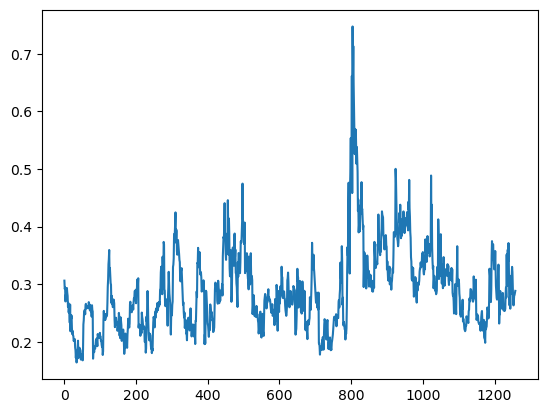

In [57]:
plt.plot(av_iv)

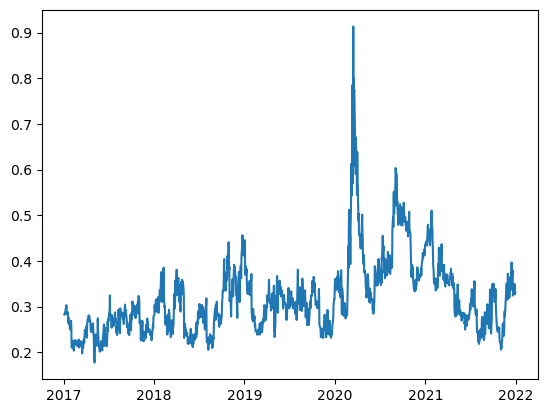

In [54]:
plt.plot(car['implied_volatility'])

In [67]:
car

,forward_price,time_to_maturity,tau,risk_free_rate,is_call,strike_price,option_price,atm_price,moneyness,implied_volatility
date,,,,,,,,,,
2017-01-03,115.854319,31.000000,0.084932,0.008510,0.0,115.500000,3.427569,115.687754,0.998377,0.282766
2017-01-04,115.542912,33.500000,0.091781,0.008740,0.0,115.500000,3.466563,115.555105,0.999523,0.284495
2017-01-05,116.130980,32.500000,0.089041,0.008775,0.0,116.000000,3.411818,116.143296,0.998766,0.283089
2017-01-06,117.429637,31.500000,0.086301,0.008819,0.0,117.500000,3.403333,117.442195,1.000492,0.287434
2017-01-09,118.505899,29.307692,0.080295,0.008980,0.0,118.423077,3.443269,118.515679,0.999219,0.296791
...,...,...,...,...,...,...,...,...,...,...
2021-12-27,180.345298,32.000000,0.087671,0.005607,0.0,180.000000,6.545357,180.399200,0.997787,0.331978
2021-12-28,179.301134,31.000000,0.084932,0.005548,0.0,180.000000,6.448214,179.355316,1.003594,0.349487
2021-12-29,179.359535,33.500000,0.091781,0.005440,0.0,180.000000,6.690179,179.258950,1.004134,0.342204


In [71]:
pd.to_datetime(car[,format = '%Y-%m-%d')

ValueError: to assemble mappings requires at least that [year, month, day] be specified: [day,month,year] is missing

In [91]:
car.reset_index(inplace = True)

In [93]:
pd.to_datetime(car['date'],format = '%Y-%m-%d')

0      2017-01-03
1      2017-01-04
2      2017-01-05
3      2017-01-06
4      2017-01-09
          ...    
1254   2021-12-27
1255   2021-12-28
1256   2021-12-29
1257   2021-12-30
1258   2021-12-31
Name: date, Length: 1259, dtype: datetime64[ns]

In [98]:
car['date'][1]

Timestamp('2017-01-04 00:00:00')

In [110]:
test = average_iv.resample('1d').mean().dropna().reset_index()


In [112]:
test['date'][0]

Timestamp('2017-01-03 00:00:00')

In [113]:
test

,date,forward_price,time_to_maturity,tau,risk_free_rate,is_call,strike_price,option_price,atm_price,moneyness,implied_volatility
0,2017-01-03,115.854319,31.000000,0.084932,0.008510,0.0,115.500000,3.427569,115.687754,0.998377,0.282766
1,2017-01-04,115.542912,33.500000,0.091781,0.008740,0.0,115.500000,3.466563,115.555105,0.999523,0.284495
2,2017-01-05,116.130980,32.500000,0.089041,0.008775,0.0,116.000000,3.411818,116.143296,0.998766,0.283089
3,2017-01-06,117.429637,31.500000,0.086301,0.008819,0.0,117.500000,3.403333,117.442195,1.000492,0.287434
4,2017-01-09,118.505899,29.307692,0.080295,0.008980,0.0,118.423077,3.443269,118.515679,0.999219,0.296791
...,...,...,...,...,...,...,...,...,...,...,...
1254,2021-12-27,180.345298,32.000000,0.087671,0.005607,0.0,180.000000,6.545357,180.399200,0.997787,0.331978
1255,2021-12-28,179.301134,31.000000,0.084932,0.005548,0.0,180.000000,6.448214,179.355316,1.003594,0.349487
1256,2021-12-29,179.359535,33.500000,0.091781,0.005440,0.0,180.000000,6.690179,179.258950,1.004134,0.342204
1257,2021-12-30,178.175849,32.500000,0.089041,0.005412,0.0,177.500000,6.537857,178.276533,0.995644,0.327376
